<a href="https://colab.research.google.com/github/bobbyknit007/ML/blob/main/Classifier/DecisionTree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pydotplus

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [25]:
df = pd.read_csv('/content/PastHires.csv')


In [26]:
df.head(5)

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [27]:
d ={'Y' :1 , 'N':0}
df['Hired']=df['Hired'].map(d)
df['Employed?']=df['Employed?'].map(d)
df['Top-tier school']=df['Top-tier school'].map(d)
df['Interned']=df['Interned'].map(d)
d ={'BS' :0 , 'MS':1, 'PhD':2}
df['Level of Education']=df['Level of Education'].map(d)

In [28]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [29]:
num = df.select_dtypes(exclude=['object']).columns.tolist()
print(num)

['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned', 'Hired']


Years Experience
Employed?
Previous employers
Level of Education
Top-tier school
Interned
Hired


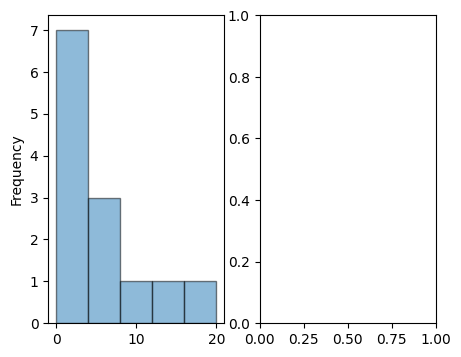

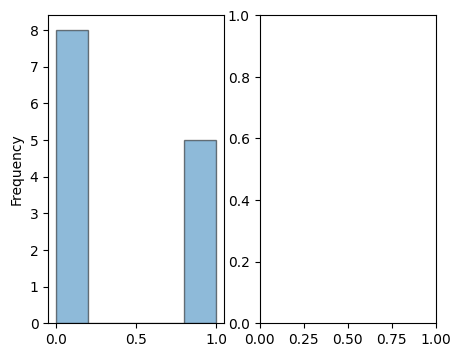

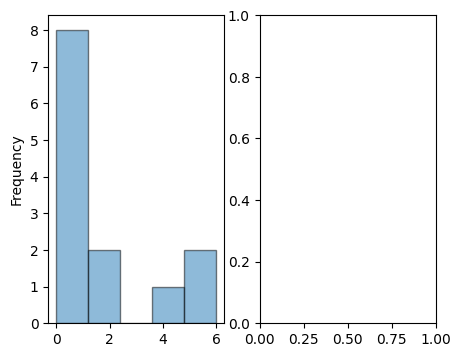

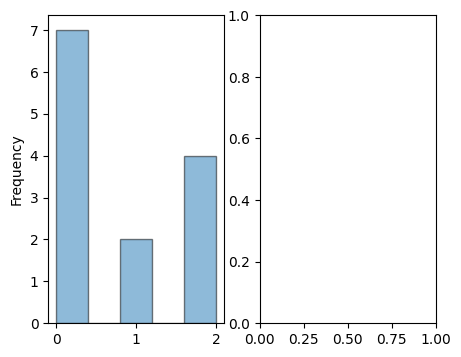

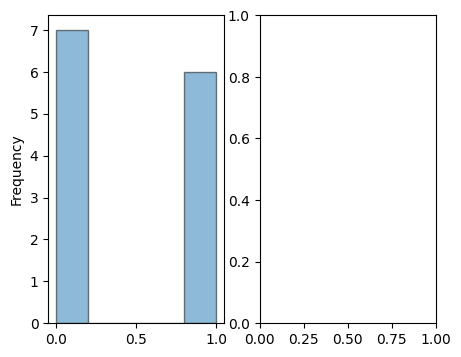

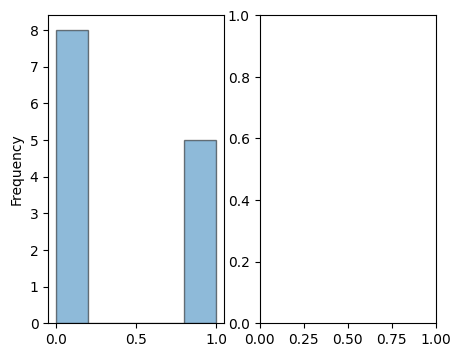

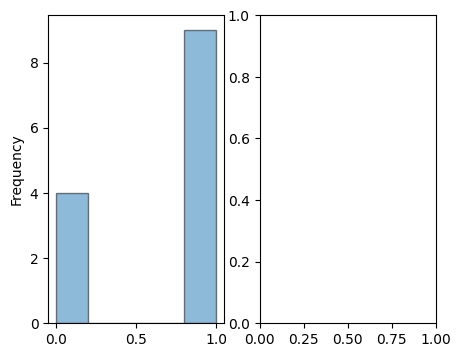

In [30]:
for col in num:
  print(col)

  plt.figure(figsize=(5,4))
  plt.subplot(1,2,1)
  df[col].hist(bins=5, alpha=0.5, grid=False, edgecolor='black')
  plt.ylabel('Frequency')
  plt.subplot(1,2,2)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [32]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In [33]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [34]:
y= df['Hired']
X = df[features]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [38]:
X_train[X_train['Interned']==0]

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
8,15,1,5,0,0,0
2,7,0,6,0,0,0
12,0,0,0,2,1,0
4,20,0,2,2,1,0
10,1,0,1,2,1,0
3,2,1,1,1,1,0


In [39]:
X_train[X_train['Interned']==1]

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
5,0,0,0,2,1,1
1,0,0,0,0,1,1
7,3,0,1,0,0,1
6,5,1,2,1,0,1


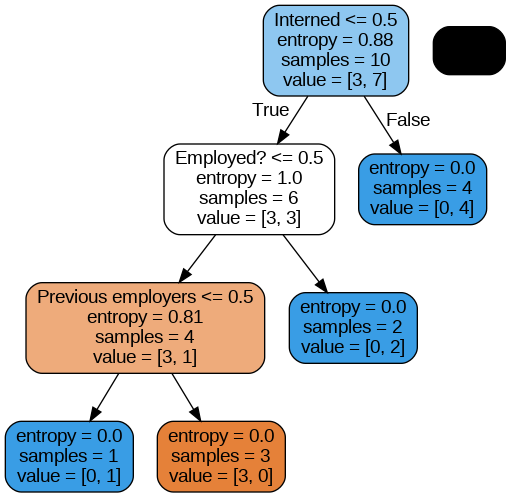

In [40]:
dot_data = export_graphviz(model , feature_names=X_train.columns, rounded=True, proportion=False, precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())